In [8]:
#@title Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
#@title Carregar o dataset
df = pd.read_csv('https://raw.githubusercontent.com/aaqibqadeer/Hotel-booking-demand/master/hotel_bookings.csv')

In [10]:
df.head(1000)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Resort Hotel,1,122,2015,August,33,9,2,4,2,...,No Deposit,240.0,NaN,0,Transient,166.0,0,2,Canceled,27-05-15
996,Resort Hotel,1,41,2015,August,33,9,2,4,2,...,No Deposit,240.0,NaN,0,Transient,202.0,0,2,Canceled,17-07-15
997,Resort Hotel,1,41,2015,August,33,9,2,4,2,...,No Deposit,240.0,NaN,0,Transient,172.0,0,2,Canceled,17-07-15
998,Resort Hotel,0,81,2015,August,33,9,2,4,2,...,No Deposit,250.0,NaN,0,Transient,277.0,1,1,Check-Out,15-08-15


In [11]:
#@title Dados faltantes
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
#@title Remover dados faltantes
df = df.drop(['company'], axis=1)
df = df.drop(['agent'], axis=1)
df = df.drop(['country'], axis=1)
df = df.dropna()

In [13]:
#@title Correlaçao entre is_canceled e os outros dados
df.corr()['is_canceled'].sort_values()

C:\Users\jeyso\AppData\Local\Temp\ipykernel_12252\3983730449.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['is_canceled'].sort_values()


total_of_special_requests        -0.234706
required_car_parking_spaces      -0.195492
booking_changes                  -0.144371
is_repeated_guest                -0.084788
previous_bookings_not_canceled   -0.057355
babies                           -0.032488
arrival_date_day_of_month        -0.006084
stays_in_weekend_nights          -0.001783
children                          0.005048
arrival_date_week_number          0.008132
arrival_date_year                 0.016732
stays_in_week_nights              0.024771
adr                               0.047622
days_in_waiting_list              0.054193
adults                            0.059990
previous_cancellations            0.110140
lead_time                         0.293177
is_canceled                       1.000000
Name: is_canceled, dtype: float64

In [14]:
#@ title Remover dados que nao tem muita influencia no modelo
df = df.drop(['arrival_date_month'], axis=1)
df = df.drop(['arrival_date_year'], axis=1)
df = df.drop(['arrival_date_week_number'], axis=1)
df = df.drop(['arrival_date_day_of_month'], axis=1)
df = df.drop(['reservation_status'], axis=1)
df = df.drop(['reservation_status_date'], axis=1)
df = df.drop(['hotel'], axis=1)
df = df.drop(['adults'], axis=1)
df = df.drop(['meal'], axis=1)
df = df.drop(['children'], axis=1)
df = df.drop(['babies'], axis=1)
df = df.drop(['deposit_type'], axis=1)
df = df.drop(['customer_type'], axis=1)

In [15]:
df.head(10)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,0,0,Direct,Direct,0,0,0,C,C,3,0,0.0,0,0
1,0,737,0,0,Direct,Direct,0,0,0,C,C,4,0,0.0,0,0
2,0,7,0,1,Direct,Direct,0,0,0,A,C,0,0,75.0,0,0
3,0,13,0,1,Corporate,Corporate,0,0,0,A,A,0,0,75.0,0,0
4,0,14,0,2,Online TA,TA/TO,0,0,0,A,A,0,0,98.0,0,1
5,0,14,0,2,Online TA,TA/TO,0,0,0,A,A,0,0,98.0,0,1
6,0,0,0,2,Direct,Direct,0,0,0,C,C,0,0,107.0,0,0
7,0,9,0,2,Direct,Direct,0,0,0,C,C,0,0,103.0,0,1
8,1,85,0,3,Online TA,TA/TO,0,0,0,A,A,0,0,82.0,0,1
9,1,75,0,3,Offline TA/TO,TA/TO,0,0,0,D,D,0,0,105.5,0,0


In [16]:
#@title Converter as variáveis categóricas em numéricas usando LabelEncoder
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']):
    df[col] = label_encoder.fit_transform(df[col])

df.head(100)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,0,0,3,1,0,0,0,2,2,3,0,0.00,0,0
1,0,737,0,0,3,1,0,0,0,2,2,4,0,0.00,0,0
2,0,7,0,1,3,1,0,0,0,0,2,0,0,75.00,0,0
3,0,13,0,1,2,0,0,0,0,0,0,0,0,75.00,0,0
4,0,14,0,2,6,3,0,0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,72,0,2,6,3,0,0,0,0,0,0,0,73.80,0,1
96,1,63,2,5,6,3,0,0,0,5,5,0,0,117.00,0,1
97,0,63,2,5,5,3,0,0,0,4,4,0,0,196.54,0,1
98,0,101,2,5,6,3,0,0,0,3,3,0,0,99.30,1,2


In [17]:
#@title Separar os dados em caracteristicas e variavel alvo

X = df.drop(['is_canceled'], axis=1)
y = df['is_canceled']

In [21]:
#@title Normalização dos dados e X

scaler = StandardScaler(with_mean=False, with_std=True, copy=False)
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_normalized.head(100)


,lead_time,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,3.200364,0.000000,0.000000,2.368364,1.101865,0.0,0.0,0.0,1.178340,1.064518,4.599023,0.0,0.000000,0.000000,0.000000
1,6.896691,0.000000,0.000000,2.368364,1.101865,0.0,0.0,0.0,1.178340,1.064518,6.132030,0.0,0.000000,0.000000,0.000000
2,0.065505,0.000000,0.524032,2.368364,1.101865,0.0,0.0,0.0,0.000000,1.064518,0.000000,0.0,1.484136,0.000000,0.000000
3,0.121651,0.000000,0.524032,1.578910,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.484136,0.000000,0.000000
4,0.131009,0.000000,1.048064,4.736729,3.305594,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.939271,0.000000,1.261361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.673761,0.000000,1.048064,4.736729,3.305594,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.460390,0.000000,1.261361
96,0.589541,2.002776,2.620159,4.736729,3.305594,0.0,0.0,0.0,2.945849,2.661296,0.000000,0.0,2.315252,0.000000,1.261361
97,0.589541,2.002776,2.620159,3.947274,3.305594,0.0,0.0,0.0,2.356679,2.129036,0.000000,0.0,3.889228,0.000000,1.261361
98,0.945137,2.002776,2.620159,4.736729,3.305594,0.0,0.0,0.0,1.767510,1.596777,0.000000,0.0,1.964996,4.076741,2.522721


C:\Users\jeyso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


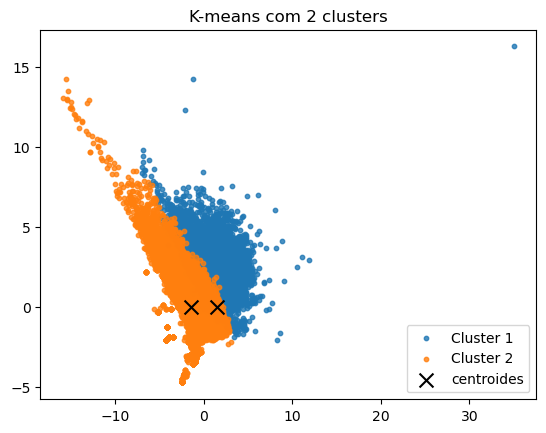

In [22]:
# Criação do objeto KMeans
kmeans = KMeans(n_clusters=2, random_state=0)

# Ajuste do modelo aos dados
kmeans.fit(X_normalized)

# Obtenção das etiquetas dos clusters
labels = kmeans.labels_

# Obtenção das coordenadas dos centróides
centroids = kmeans.cluster_centers_

# Transformar a matriz em 2 colunas
pca = PCA(n_components=2)
matriz_reduzida_ft = pca.fit_transform(X_normalized)

# Transformar centroids em 2 colunas
centroids_reduzidos = pca.fit_transform(centroids)

for label in set(labels):
    if label == -1:
        plt.scatter(matriz_reduzida_ft[labels == label, 0], matriz_reduzida_ft[labels == label, 1], c='black', label='Outliers', s=10, alpha=0.8)
    else:
        plt.scatter(matriz_reduzida_ft[labels == label, 0], matriz_reduzida_ft[labels == label, 1], label='Cluster {}'.format(label+1), s=10, alpha=0.8)

# Plot dos centróides
plt.scatter(centroids_reduzidos[:, 0], centroids_reduzidos[:, 1], marker='x', color='black', s=100, label='centroides')

plt.title('K-means com 2 clusters')
plt.legend()
plt.show()

In [23]:
from scipy.spatial.distance import cdist

# Calcule as distâncias dos pontos para os centros dos clusters
distances = cdist(X, kmeans.cluster_centers_, 'euclidean')

# Calcule a distância média para cada ponto
average_distances = distances.mean(axis=1)


# Defina um limiar para identificar outliers
threshold = 35  # Ajuste o valor do limiar conforme necessário

# Identifique os pontos que estão acima do limiar como outliers
outliers = X[average_distances > threshold]

print(outliers.shape)

(116323, 15)


In [25]:
#@title Separar os dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=40)


In [26]:
#@title Treinar o modelo usando RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features='auto')

rfc.fit(X_train, y_train)

#@title Fazer previsões

predictions = rfc.predict(X_test)

#@title Avaliar o modelo

print('Acurácia: ', accuracy_score(y_test, predictions))



C:\Users\jeyso\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Acurácia:  0.849945556579278


In [34]:
#@title Simular diminuição do "lead_time" para verificar a possível diminuição da taxa de cancelamento

# Calcular as taxas de cancelamento antes das alterações
taxa_cancelamento_antes = predictions.mean()

# Copiar os dados originais para preservar os valores originais
X_test_modified = X_test.copy()

# Fazer as alterações nos dados modificados
X_test_modified['lead_time'] = X_test_modified['lead_time'] - (X_test_modified['lead_time'] * 0.1)

# Fazer previsões no conjunto de teste modificado
predictions_modified = rfc.predict(X_test_modified)

# Calcular as taxas de cancelamento após as alterações
taxa_cancelamento_depois = predictions_modified.mean()

# Exibir as taxas de cancelamento
print('Taxa de cancelamento original:', taxa_cancelamento_antes)
print('Taxa de cancelamento após as alterações:', taxa_cancelamento_depois)

Taxa de cancelamento original: 0.3555574168690845
Taxa de cancelamento após as alterações: 0.3093223888097831
